In [32]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#12.07.25
# 16:30
# Base directory path
# base_dir = r"/"
# data_dir = os.path.join(base_dir, "data")
data_dir = os.path.join("data")
# Month mappings for processing
months = {
    "202409": "September 2024",
    "202412": "December 2024",
    "202503": "March 2025",
    "202506": "June 2025"
}

In [34]:
# Set path to the example file for EDA
eda_dir = os.path.join("data", "202503-citibike-tripdata_4.csv")

# Load the file for EDA
eda_df = pd.read_csv(eda_dir)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27088\1165917235.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  eda_df = pd.read_csv(eda_dir)


In [35]:

# Display the first few rows
print("Head of the dataset:")
print(eda_df.head(5))

Head of the dataset:
            ride_id  rideable_type               started_at  \
0  CB745D15A597114B  electric_bike  2025-03-26 19:01:42.654   
1  04D519383AACD8AB   classic_bike  2025-03-28 15:42:10.588   
2  775E276CD7E24B49   classic_bike  2025-03-27 22:55:05.118   
3  7500A32DBD15415C  electric_bike  2025-03-20 14:06:08.263   
4  A36CBEC7EDFFD641   classic_bike  2025-03-24 07:28:05.769   

                  ended_at                       start_station_name  \
0  2025-03-26 19:24:14.053               Carlton Ave & St Marks Ave   
1  2025-03-28 15:53:42.027               Carlton Ave & St Marks Ave   
2  2025-03-27 23:05:52.203                  Franklin St & Dupont St   
3  2025-03-20 14:10:56.044  Eastern Pkwy & Franklin Ave (SW Corner)   
4  2025-03-24 07:33:17.765                     31 St & Astoria Blvd   

  start_station_id          end_station_name end_station_id  start_lat  \
0          4199.13  Bedford Ave & Nassau Ave        5550.05  40.679119   
1          4199.13       

In [36]:

# Count rows with at least one NaN value
rows_with_nan = eda_df.isna().any(axis=1).sum()

# Count rows with at least one zero value
rows_with_zero = (eda_df == 0).any(axis=1).sum()

# Count rows where all values are NaN
rows_fully_empty = eda_df.isna().all(axis=1).sum()
rows_with_6_or_more_nan = (eda_df.isna().sum(axis=1) >= 6).sum()

# Identify the column with the most missing values
most_missing_col = eda_df.isna().sum().idxmax()
most_missing_count = eda_df.isna().sum().max()

In [37]:
print(f"Number of rows with at least 6 NaN values: {rows_with_6_or_more_nan}")
print(f"\nRows with at least one NaN: {rows_with_nan}")
print(f"Rows with at least one 0: {rows_with_zero}")
print(f"Rows fully empty: {rows_fully_empty}")
print(f"Column with most NaNs: '{most_missing_col}' ({most_missing_count} missing)")

Number of rows with at least 6 NaN values: 0

Rows with at least one NaN: 80
Rows with at least one 0: 0
Rows fully empty: 0
Column with most NaNs: 'start_station_name' (66 missing)


In [38]:

# Print column data types
print("\nColumn data types:")
print(eda_df.dtypes)

# Check for mixed-type columns
print("Columns with mixed data types and their type breakdown:")
for col in eda_df.columns:
    type_counts = eda_df[col].map(type).value_counts()
    if len(type_counts) > 1:
        print(f"\nColumn '{col}' has mixed types:")
        print(type_counts)



Column data types:
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
Columns with mixed data types and their type breakdown:

Column 'start_station_name' has mixed types:
start_station_name
<class 'str'>      168205
<class 'float'>        66
Name: count, dtype: int64

Column 'start_station_id' has mixed types:
start_station_id
<class 'str'>      168205
<class 'float'>        66
Name: count, dtype: int64

Column 'start_station_name' has mixed types:
start_station_name
<class 'str'>      168205
<class 'float'>        66
Name: count, dtype: int64

Column 'start_station_id' has mixed types:
start_station_id
<class 'str'>      168205
<class '

In [39]:
# Print basic descriptive statistics
print("\nBasic statistics:")
print(eda_df.describe(include='all'))


Basic statistics:
                 ride_id  rideable_type               started_at  \
count             168271         168271                   168271   
unique            168271              2                   168258   
top     420185B1D060DF9A  electric_bike  2025-03-23 11:37:03.812   
freq                   1         119737                        2   
mean                 NaN            NaN                      NaN   
std                  NaN            NaN                      NaN   
min                  NaN            NaN                      NaN   
25%                  NaN            NaN                      NaN   
50%                  NaN            NaN                      NaN   
75%                  NaN            NaN                      NaN   
max                  NaN            NaN                      NaN   

                       ended_at        start_station_name start_station_id  \
count                    168271                    168205           168205   
unique  

In [40]:
print("Available columns:", eda_df.columns.tolist())


Available columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


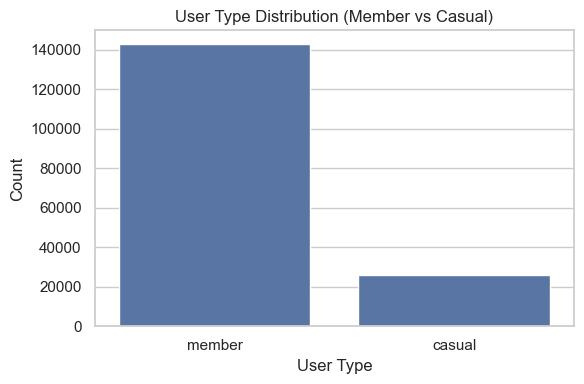

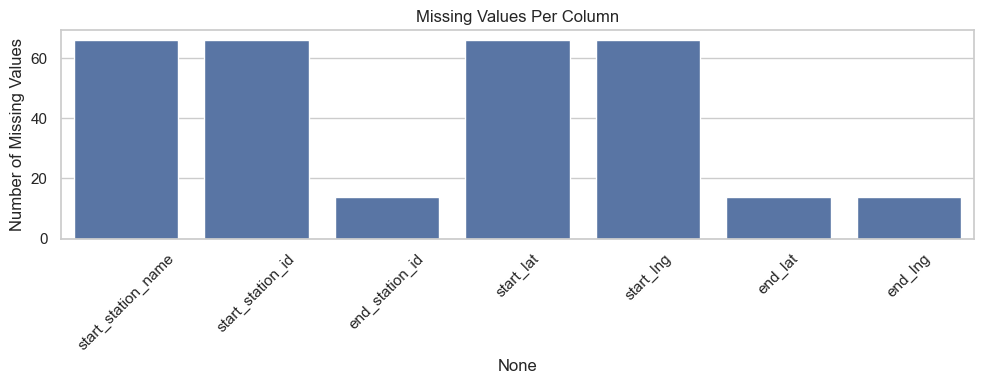

In [41]:
sns.set(style="whitegrid")

# 1. Count of trips per user type (member_casual)
if 'member_casual' in eda_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=eda_df, x='member_casual', order=eda_df['member_casual'].value_counts().index)
    plt.title('User Type Distribution (Member vs Casual)')
    plt.xlabel('User Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 2. Missing values per column (only if any exist)
missing_counts = eda_df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_counts.index, y=missing_counts.values)
    plt.title('Missing Values Per Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Start hour distribution
if 'start_hour' in eda_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='start_hour', data=eda_df, palette='crest')
    plt.title('Number of Trips by Start Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Trip Count')
    plt.tight_layout()
    plt.show()

In [42]:
def process_all_csvs(data_dir):
    """Process all CSV files in the data directory and subfolders"""
    csv_files = glob.glob(os.path.join(data_dir, '**', '*.csv'), recursive=True)
    print(f"Found {len(csv_files)} CSV files in {data_dir}")
    processed_data = {}
    for file in csv_files:
        print(f"\n=== Processing {file} ===")
        try:
            df = pd.read_csv(file)
            print(f"  Loaded {file}: {len(df)} rows")
        except Exception as e:
            print(f"  Error loading {file}: {e}")
            continue

        # Remove rows with more than 6 missing values
        original_len = len(df)
        df = df[df.isna().sum(axis=1) <= 6]
        removed = original_len - len(df)
        print(f"  Removed {removed} rows with more than 6 NaN values")

        # Remove rows with missing station info
        required_cols = ['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
        df = df.dropna(subset=required_cols)

        # Convert datetime columns if present
        if 'started_at' in df.columns and 'ended_at' in df.columns:
            df['started_at'] = pd.to_datetime(df['started_at'])
            df['ended_at'] = pd.to_datetime(df['ended_at'])
            df['start_date'] = df['started_at'].dt.date
            df['end_date'] = df['ended_at'].dt.date

        # Calculate daily balances if possible
        if 'start_date' in df.columns and 'end_date' in df.columns:
            daily_balances = calculate_daily_station_balance(df)
            # Save processed data
            output_file = os.path.join(f"processed_{os.path.basename(file)}")
            daily_balances.to_csv(output_file, index=False)
            processed_data[file] = daily_balances
            print(f"  Saved {len(daily_balances)} station-day records to {output_file}")
            print(f"  Date range: {daily_balances['date'].min()} to {daily_balances['date'].max()}")
            print(f"  Unique stations: {daily_balances['station_id'].nunique()}")
            print(f"  Average daily net balance: {daily_balances['net_balance'].mean():.2f}")
        else:
            print(f"  Skipped {file} - missing date columns")

    print(f"\n=== Processing Complete ===")
    print(f"Processed {len(processed_data)} files")

    # Display sample data
    if processed_data:
        sample_file = list(processed_data.keys())[0]
        print(f"\nSample data from {sample_file}:")
        print(processed_data[sample_file].head())
        print(f"\nData types:")
        print(processed_data[sample_file].dtypes)

process_all_csvs(data_dir)

Found 2 CSV files in data

=== Processing data\202412-citibike-tripdata_4.csv ===


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27088\2038515929.py:9: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


  Loaded data\202412-citibike-tripdata_4.csv: 1000000 rows
  Removed 187 rows with more than 6 NaN values
  Removed 187 rows with more than 6 NaN values
  Saved 77390 station-day records to processed_202412-citibike-tripdata_4.csv
  Date range: 2024-11-30 to 2024-12-31
  Unique stations: 4016
  Average daily net balance: 0.00

=== Processing data\202503-citibike-tripdata_4.csv ===
  Saved 77390 station-day records to processed_202412-citibike-tripdata_4.csv
  Date range: 2024-11-30 to 2024-12-31
  Unique stations: 4016
  Average daily net balance: 0.00

=== Processing data\202503-citibike-tripdata_4.csv ===


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27088\2038515929.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


  Loaded data\202503-citibike-tripdata_4.csv: 168271 rows
  Removed 0 rows with more than 6 NaN values
  Saved 30416 station-day records to processed_202503-citibike-tripdata_4.csv
  Date range: 2025-03-14 to 2025-03-31
  Unique stations: 2255
  Average daily net balance: 0.00

=== Processing Complete ===
Processed 2 files

Sample data from data\202412-citibike-tripdata_4.csv:
  station_id              station_name        lat        lng        date  \
0    5947.04           W 13 St & 5 Ave  40.735445 -73.994310  2024-11-30   
1    5303.08     Canal St & Rutgers St  40.714275 -73.989900  2024-11-30   
2    7311.07        W 78 St & Broadway  40.783400 -73.980931  2024-11-30   
3    6890.06          W 50 St & 10 Ave  40.764734 -73.991944  2024-11-30   
4    5955.12  Perry St & Greenwich Ave  40.735918 -74.000939  2024-11-30   

   departures  arrivals  net_balance  
0         1.0       0.0         -1.0  
1         1.0       0.0         -1.0  
2         1.0       0.0         -1.0  
3      

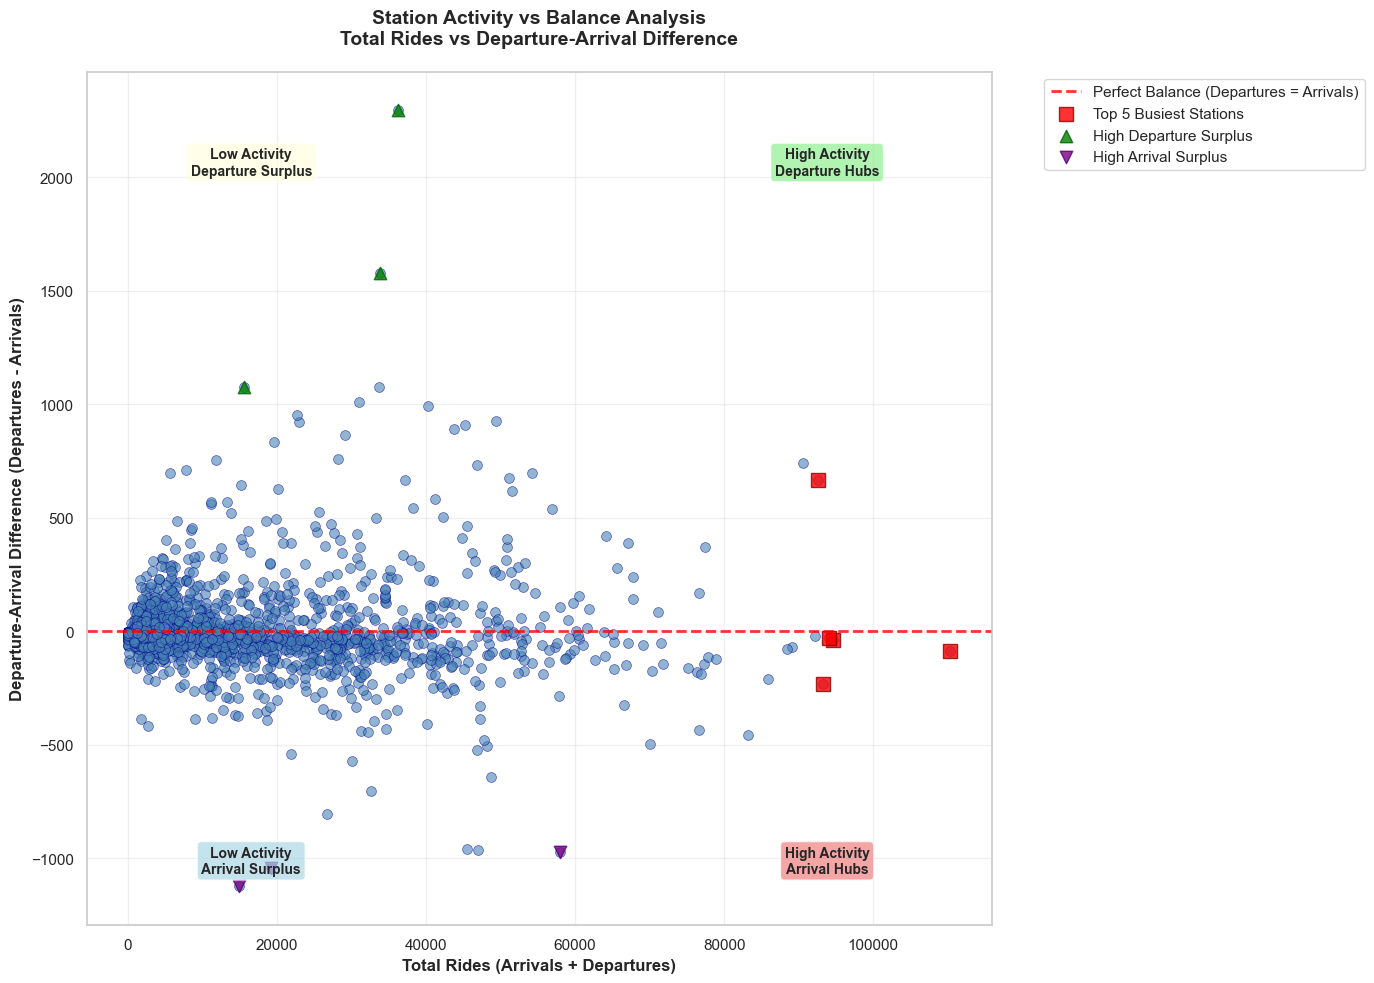

In [43]:
processed_files = [
    'processed_202409.csv',
    'processed_202412.csv',
    'processed_202503.csv',
    'processed_202506.csv'
]
all_processed_data = pd.concat([
    pd.read_csv(f) for f in processed_files if os.path.exists(f)
], ignore_index=True)
#Calculate station-level statistics
station_analysis = all_processed_data.groupby('station_name').agg({
    'arrivals': 'sum',
    'departures': 'sum',
    'net_balance': 'sum'
}).reset_index()

# Calculate total rides and departure-arrival difference
station_analysis['total_rides'] = station_analysis['arrivals'] + station_analysis['departures']
station_analysis['departure_arrival_diff'] = station_analysis['departures'] - station_analysis['arrivals']

# Create the scatter plot
plt.figure(figsize=(14, 10))

# Main scatter plot
plt.scatter(station_analysis['total_rides'], 
           station_analysis['departure_arrival_diff'],
           alpha=0.6, s=50, c='steelblue', edgecolors='darkblue', linewidth=0.5)

# Add reference lines
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Perfect Balance (Departures = Arrivals)')

# Identify and highlight interesting points
# Top 5 busiest stations
top_busy = station_analysis.nlargest(5, 'total_rides')
plt.scatter(top_busy['total_rides'], top_busy['departure_arrival_diff'], 
           s=100, c='red', alpha=0.8, marker='s', edgecolors='darkred', linewidth=1,
           label='Top 5 Busiest Stations')

# Top 5 most imbalanced stations (positive and negative)
top_departure_surplus = station_analysis.nlargest(3, 'departure_arrival_diff')
top_arrival_surplus = station_analysis.nsmallest(3, 'departure_arrival_diff')
plt.scatter(top_departure_surplus['total_rides'], top_departure_surplus['departure_arrival_diff'],
           s=80, c='green', alpha=0.8, marker='^', edgecolors='darkgreen', linewidth=1,
           label='High Departure Surplus')
plt.scatter(top_arrival_surplus['total_rides'], top_arrival_surplus['departure_arrival_diff'],
           s=80, c='purple', alpha=0.8, marker='v', edgecolors='indigo', linewidth=1,
           label='High Arrival Surplus')

# Formatting
plt.xlabel('Total Rides (Arrivals + Departures)', fontsize=12, fontweight='bold')
plt.ylabel('Departure-Arrival Difference (Departures - Arrivals)', fontsize=12, fontweight='bold')
plt.title('Station Activity vs Balance Analysis\nTotal Rides vs Departure-Arrival Difference', 
         fontsize=14, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add quadrant labels
max_x, max_y = station_analysis['total_rides'].max(), station_analysis['departure_arrival_diff'].max()
min_y = station_analysis['departure_arrival_diff'].min()

plt.text(max_x * 0.85, max_y * 0.9, 'High Activity\nDeparture Hubs', 
         ha='center', va='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

plt.text(max_x * 0.85, min_y * 0.9, 'High Activity\nArrival Hubs', 
         ha='center', va='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))

plt.text(max_x * 0.15, max_y * 0.9, 'Low Activity\nDeparture Surplus', 
         ha='center', va='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))

plt.text(max_x * 0.15, min_y * 0.9, 'Low Activity\nArrival Surplus', 
         ha='center', va='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()




In [47]:
# Convert 'started_at' to separate date and time columns for each original dataset and remove ride id, customer type, started_at, and ended_at columns
import pandas as pd
import os
import glob

# Automatically find all CSVs in the data folder
csv_files = glob.glob(os.path.join("data", "*.csv"))
for file_path in csv_files:
    df = pd.read_csv(file_path)
    if 'started_at' in df.columns:
        df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
        df['start_date'] = df['started_at'].dt.date
        df['start_time'] = df['started_at'].dt.time
        # Remove ride id, customer type, started_at, and ended_at columns if present
        drop_cols = [col for col in ['ride_id', 'member_casual', 'usertype', 'customer_type', 'started_at', 'ended_at'] if col in df.columns]
        if drop_cols:
            df = df.drop(columns=drop_cols)
            print(f"{os.path.basename(file_path)}: Dropped columns: {drop_cols}")
        print(f"{os.path.basename(file_path)}: Converted and dropped columns. After transformation head:")
        print(df.head())
        # Save cleaned file as rides_MM_YYYY_cleaned.csv
        # Use first available date to determine month/year
        if not df.empty and 'start_date' in df.columns:
            first_date = pd.to_datetime(df['start_date'].dropna().iloc[0])
            mm = f"{first_date.month:02d}"
            yyyy = f"{first_date.year}"
            output_name = f"rides_{mm}_{yyyy}_cleaned.csv"
        else:
            # Fallback: use original filename
            base_name = os.path.splitext(os.path.basename(file_path))[0]
            output_name = f"{base_name}_cleaned.csv"
        output_path = os.path.join(os.path.dirname(os.path.abspath("processed_202409.csv")), output_name)
        df.to_csv(output_path, index=False)
        print(f"Saved cleaned data to {output_path}")
    else:
        print(f"{os.path.basename(file_path)}: 'started_at' column not found.")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27088\351637971.py:9: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


202412-citibike-tripdata_4.csv: Dropped columns: ['ride_id', 'member_casual', 'started_at', 'ended_at']
202412-citibike-tripdata_4.csv: Converted and dropped columns. After transformation head:
   rideable_type           start_station_name start_station_id  \
0   classic_bike     Clifton Pl & Bedford Ave          4485.10   
1  electric_bike          Broadway & W 165 St          8191.01   
2   classic_bike  W 82 St & Central Park West          7304.08   
3  electric_bike              W 36 St & 9 Ave          6569.07   
4  electric_bike           Broadway & W 29 St          6289.06   

              end_station_name end_station_id  start_lat  start_lng  \
0       Myrtle Ave & Lewis Ave        4729.01  40.688655 -73.955156   
1    W 170 St & University Ave        8254.01  40.839137 -73.941409   
2  Central Park West & W 85 St        7354.01  40.782750 -73.971370   
3         Duane St & Hudson St        5359.12  40.754623 -73.995168   
4              E 58 St & 3 Ave        6762.02  40.7462

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27088\351637971.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


202503-citibike-tripdata_4.csv: Dropped columns: ['ride_id', 'member_casual', 'started_at', 'ended_at']
202503-citibike-tripdata_4.csv: Converted and dropped columns. After transformation head:
   rideable_type                       start_station_name start_station_id  \
0  electric_bike               Carlton Ave & St Marks Ave          4199.13   
1   classic_bike               Carlton Ave & St Marks Ave          4199.13   
2   classic_bike                  Franklin St & Dupont St          5944.01   
3  electric_bike  Eastern Pkwy & Franklin Ave (SW Corner)          3919.12   
4   classic_bike                     31 St & Astoria Blvd          6989.07   

           end_station_name end_station_id  start_lat  start_lng    end_lat  \
0  Bedford Ave & Nassau Ave        5550.05  40.679119 -73.971763  40.723117   
1       Bond St & Fulton St        4479.06  40.679119 -73.971763  40.689622   
2  Bedford Ave & Nassau Ave        5550.05  40.735640 -73.958660  40.723117   
3   Rogers Ave & Linc

In [ ]:
import glob
import os

# Process and save cleaned versions for all available CSVs in the data folder
csv_files = glob.glob(os.path.join("data", "*.csv"))
for file_path in csv_files:
    df = pd.read_csv(file_path)
    if 'started_at' in df.columns:
        df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
        df['start_date'] = df['started_at'].dt.date
        df['start_time'] = df['started_at'].dt.time
        # Remove ride id, customer type, started_at, and ended_at columns if present
        drop_cols = [col for col in ['ride_id', 'member_casual', 'usertype', 'customer_type', 'started_at', 'ended_at'] if col in df.columns]
        if drop_cols:
            df = df.drop(columns=drop_cols)
            print(f"{os.path.basename(file_path)}: Dropped columns: {drop_cols}")
        print(f"{os.path.basename(file_path)}: Converted and dropped columns. After transformation head:")
        print(df.head())
        # Save cleaned file next to processed CSVs
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = os.path.join(os.path.dirname(os.path.abspath("processed_202409.csv")), f"{base_name}_cleaned.csv")
        df.to_csv(output_path, index=False)
        print(f"Saved cleaned data to {output_path}")
    else:
        print(f"{os.path.basename(file_path)}: 'started_at' column not found.")